<a href="https://colab.research.google.com/github/adeeconometrics/literate-programming/blob/main/Probability_Distributions_Continuous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Continuous Probability Distributions
by Dave Amiana

The purpose of this notebook is to introduce and explore some probability models for continuous variabbles; this can be seen as an extension of models in the discrete space.

The following probability distributions that we shall explore in this notebook are listed as follows:

- Normal-distribution
    - standard normal distribution
- t-distribution
- F-distribution
- $\chi^2$ distribution
- $\Gamma$ distribution

We will explore the derivation of these distributions, their motvation, assumptions, and applications. 

In [1]:
# import all the relevant packages
import matplotlib.pyplot as plt
import numpy as np
from sympy import init_printing, lambdify, N, gamma, beta, oo
import sympy as sp

sp.init_printing() # enable LaTeX output

In [2]:
x,y,z = sp.symbols('x,y,z')

## Continuous Uniform Distribution

#### Definition

Probability Density Function
$$f(x)={\begin{cases}{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b\end{cases}}$$

Cumulative Distribution Function
$$F(x)={\begin{cases}0&{\text{for }}x<a\\[8pt]{\frac {x-a}{b-a}}&{\text{for }}a\leq x\leq b\\[8pt]1&{\text{for }}x>b\end{cases}}$$

In [4]:
def uniform_dist_pdf(a,b, x):
    if (x<a or x>b):
        return 0
    else:
        return 1/(b-a)

def uniform_dist_cdf(a,b, x):
    if (x<a):
        return 0
    elif (x>b):
        return 1
    else: 
        return (x-a)/(b-a)

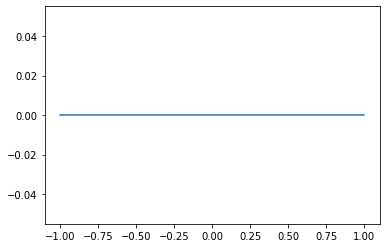

In [13]:
# visualizing pdf

a=3;b=5;x_val = 1
x_unif = np.linspace(-x_val, x_val, 100)
y_unif_pdf = np.array([uniform_dist_pdf(a,b,i) for i in x_unif])

plt.plot(x_unif, y_unif_pdf)

In [14]:
np.cumsum(y_unif_pdf)[-1] # should be very close to 1

0

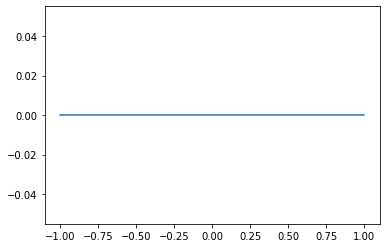

In [16]:
# visualizing cdf
y_unif_cdf = np.array([uniform_dist_cdf(a,b,i) for i in x_unif])

plt.plot(x_unif, y_unif_pdf)

In [17]:
y_unif_cdf[-1]  # should be very close to 1

0

## The Normal Distribution

*The most important continuous probability distribution in the entire field of statistics is the normal distribution - R. Walpole, 2002*

The Normal Distribution has some notable properties that which some statistical analysis are predicated upon; we call these group of analyses as *parametric statistics*, the other group that which holds no assumptions with regards to the probabilitic distribution are called *nonparametric statistics*. 

Here are the notable features of the normal distribution that would be enough to begin our exploration with different hypotheses testing:
-  The mean, median, and mode are located at the center of the distribution and are equal to each other;
    - the distribution is unimodal
- the curve is symmetric about the mean
- the curve never touches the x-axis
- the total area under a curve is equal to 1.00 or 100%

### The Normal Curve 
The graph of the normal distibution is called the *normal curve*. The mathematical equation of the probability distribution of the normal curve depends on two parameters $\mu$, the mean and $\sigma$, the standard deviation. Hence we denote the values of the density function of $X$ by $n(x; \mu, \sigma)$. We formalize this definition below. 


If $X$ is a *normal random variable* with mean $\mu$ and variance $\sigma^2$, then the equation of the *normal curve* is 

$n(x;\mu, \sigma)= {\frac{1}{\sigma\sqrt{2\pi}}}e^{- {\frac {1}{2}} (\frac {x-\mu}{\sigma})^2}$, for $- \infty<x< \infty$

Where:
- $\pi = 3.14159...$
- $e = 2.71828...$

Once $\mu$ and $\sigma$ are specified, the normal curve is completely determined.

The simplest case of the normal distribution, which we shall cover in this notebook will be the case known as the *standard normal distribution* which is notable for the defining property of the distribution that has $\mu =0$ and $\sigma = 1$ adn described by the [probability density function](https://en.wikipedia.org/wiki/Probability_density_function)

$${\displaystyle \varphi (x)={\frac {1}{\sqrt {2\pi }}}e^{-{\frac {1}{2}}x^{2}}}$$

Here, the factor $1/{\sqrt {2\pi }}$ ensures that the total area under the curve $\varphi (x)$ is equal to one. The factor $1/2$ in the exponent ensures that the distribution has unit variance (i.e., variance being equal to one), and therefore also unit standard deviation. This function is symmetric around $x=0$, where it attains its maximum value $1/{\sqrt {2\pi }}$ and has inflection points at ${\displaystyle x=+1}$ and $x=-1$.

----
### Applications of the area under a curve

The area under the standard normal distribution can be thought of as a probability i.e. if it were possible to select any z-value at random, the probability of choosing one, say between $z_1$ and $z_2$ would be the same as the area under the curve between $z_1$ and $z_2$.



In [ ]:
def normal_dist_f(x):
    return 1/(np.sqrt(2*np.pi))*np.power(np.e, -1/2*x**2)

The normal distribution

$${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$$

In [3]:
# PDF given x
def norm_dist_pdf(x, mean, std):
    return (1/(np.sqrt(2*np.pi * np.power(std, 2))))* np.power(np.e, -(np.power((x - mean), 2) / (2 * np.power(std, 2))))

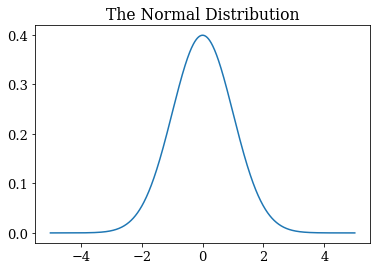

In [9]:
#plotting the pdf
mean = 0; std = 1
x_norm = np.linspace(-5,5,1000)
y_norm_f =  np.array([norm_dist_pdf(x_i, mean, std) for x_i in x_norm])

plt.title("The Normal Distribution")
plt.plot(x_norm,y_norm_f)

In [ ]:
np.cumsum(y_norm_f)[-1]

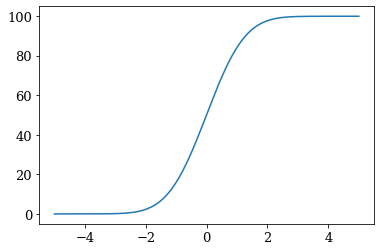

In [16]:
plt.plot(x_norm,np.cumsum(y_norm_f))

### Cumulative Distribution Function:
$${\displaystyle \Phi (x)={\frac {1}{\sqrt {2\pi }}}\int _{-\infty }^{x}e^{-t^{2}/2}\,dt}$$

The above integral cannot be expressed in terms of elementary functions, and are often said to be [special functions](https://en.wikipedia.org/wiki/Special_function). 

In [19]:
# introduce relevant symbol
t = sp.symbols("t")

In [24]:
# CDF - test this function
def norm_dist_cdf(*x_0, lower="-oo", upper=None):
    if(upper==None):
        cdf = 1/(sp.sqrt(2*sp.pi))* sp.integrate(sp.E(-t/2),(x, lower, x_0))
        return cdf
    else:
        cdf = 1/(sp.sqrt(2*sp.pi))* sp.integrate(sp.E(-t/2),(x, lower, upper))
        return cdf

In [25]:
norm_dist_cdf(0)

TypeError: ignored

In [ ]:
# plotting CDF
def norm_dist_cdf_plot(_x):
    pass

In [ ]:
# transforming normal distributions to standard normal through z-scores


----
### Basic Concepts Related to  Hypothesis Testing
Hypothesis testing is a decision-making procedure for evaluating claims about a population. 

- Null Hypothesis - hypotheses that were formulated with the hope that they be rejected. 
    - the assumption that experimental results are due to chance alone
    - assumes things to be equal $\{ =, \leq, \geq\}$

- Alternative Hypothesis - allows for the possibility of several values 
    - statement which is true if the null hypothesis is false
    - does not include equality $\{ \neq, <, >\}$

- Statistical Test - uses the data obtained from a sample to make decisions about whether the null hypothesis should be rejected 
    - Test Values - pertains to the numerical value obtained from the statistical test; hypothesis testing is a decision made to reject or not reject the null hypothesis on the basis of the **test value**.

- Errors
    - Type 1 ($\alpha$) - if you reject the $H_0$ when it is true (false positives) 
        - happens when our *significance level is too large*
    - Type 2 ($\beta$) - if you did not reject the $H_0$ when it is false (false negative)
        - happens when our *significance level is too small*

- Critical Values - determines critical and non-critical regions upon which our decision will be based on. 
    - Critical region - the range of values of the **test value** that indicates that there is a significant difference and the $H_0$ should be rejected.
    - non-critical region - the range of values of the **test value** that indicates the difference was probably due to chance and that the $H_0$ should not be rejected. 
    
- Level of Significance - the maximum probability (or threshold) of committing a **type 1 error**. 


The procedure for testing the *acceptability* of an assertion given by the *hypothesis statement*. The crucial step of this procedure is for declaring our hypothesis statements and making decisions about the hypothesis. 

1. Define the population
2. Select a sample from the population (collect data)
3. State the particular hypothesis that will be investigated 
    - Null hypothesis ($H_0$) - assets that there is *no significant difference between a parameter and a specific value*.
    - Alternative hypothesis ($H_a$) - asserts that there is a difference between parameters
4. Give the significance level. The default value is $\alpha = 0.05$. 
5. Choose the appropriate **test statistic** and establish the **rejection region**
6. Compute for the value of the test statistic from the sample
7. Makr a decision. Reject $H_0$ if the test statistic has a value in the critical region, otherwise do not reject. 
8. Reach a conclusion. 

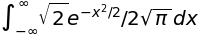

In [23]:
# computing the z-score
P =  1/(sp.sqrt(2*sp.pi))*sp.E**((-x**2)/2)
# uppper bound
u = oo
# lower bound
l = -oo
display(sp.Integral(P,(x,l,u)))

sp.integrate(P,(x,l,u))

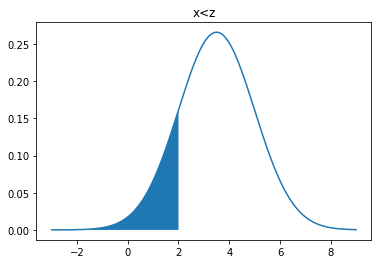

In [ ]:
# plotting shaded region of the z-distribution
from scipy.stats import norm

x = np.arange(-3,9,0.001)

def draw_z_score(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()


z = 2
draw_z_score(x, x<z, 3.5, 1.5, "x<z")

## T distribution
Discussion:

The student's t-distribution (or simply t-distribution) is  any member of a family of continuous probability distributions that arise when estimating the mean of a normally-distributed population in situations where the sample size is small and the population's standard deviation is unknown.

### Functional Definition
#### Probability Density Function:

The probability density function is symmetric, and its overall shape resembles the bell shape of a normally distributed variable with mean 0 and variance 1, except that it is a bit lower and wider. As the number of degrees of freedom grows, the t-distribution approaches the normal distribution with mean 0 and variance 1

$$f(t) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{\!-\frac{\nu+1}{2}},\!$$

where $v$ is the number of degrees of freedom and $\Gamma$ is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function).

The density function of the t-distribution may also be written in terms of the $\beta$ -function. 

$$f(t) = \frac{1}{\sqrt{\nu}\,\mathrm{B} (\frac{1}{2}, \frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{\!-\frac{\nu+1}{2}}\!,$$

where B is the [beta-function](https://en.wikipedia.org/wiki/Beta_function). 

#### Cumulative Distribution Function:

The cumulative distribution function can be written in terms of I, the regularized incomplete beta function. For t > 0,

$${\displaystyle F(t)=\int _{-\infty }^{t}f(u)\,du=1-{\tfrac {1}{2}}I_{x(t)}\left({\tfrac {\nu }{2}},{\tfrac {1}{2}}\right),}$$

where

$$x(t) = \frac{\nu}{{t^2+\nu}}$$

Other values would be obtained by symmetry. An alternative formula, valid for $t^2 < \nu$, is

$${\displaystyle \int _{-\infty }^{t}f(u)\,du={\tfrac {1}{2}}+t{\frac {\Gamma \left({\tfrac {1}{2}}(\nu +1)\right)}{{\sqrt {\pi \nu }}\,\Gamma \left({\tfrac {\nu }{2}}\right)}}\,{}_{2}F_{1}\left({\tfrac {1}{2}},{\tfrac {1}{2}}(\nu +1);{\tfrac {3}{2}};-{\tfrac {t^{2}}{\nu }}\right),}$$

where $_ 2F_1$ is a particular case of the hypergeometric function.

For implementing this distribution, we will use a library in SymPy to define the gamma function and beta-function symbolically. 


In [ ]:
# introduct symbols
df, t = sp.symbols("v, t")

### $\Gamma$-function:

$$\Gamma(x) := \int^{\infty}_{0} t^{x-1} e^{-t} \mathrm{d}t.$$

In [ ]:
# user-defined lambda function definition from the above integral
# for some reason this is much slower than SymPy's implementation of the Gamma function

g = lambda x: N(sp.Integral(t**(x-1)*E**(- t),(t,0, oo)))
g(sp.pi)

In [ ]:
# using the gamma function implementation in Sympy
N(gamma(pi))

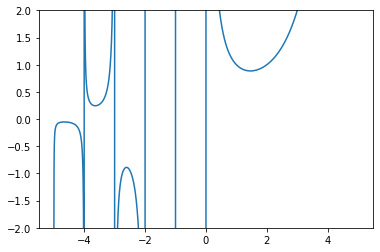

In [ ]:
# plotting the gamma function using scipy

# defining gamma function in numpy
x = np.linspace(-5, 5, 10000)
γ = np.array([gamma(i) for i in x])

plt.plot(x, γ)
plt.ylim(-2,2)

In [ ]:
# Γ function definition of PDF
expr = (sp.gamma((df+1)/2)/(sp.sqrt(df*sp.pi)*(sp.gamma(df/2))))*(1+(t**2/df))**(-(df+1)/2)
k = sp.lambdify([df,t], expr, "sympy")
res  = k(1,.1)
N(res)

### The $\beta$ - function:
$${\displaystyle \mathrm {B} (x,y)=\int _{0}^{1}t^{x-1}(1-t)^{y-1}\,dt}$$

In [ ]:
# β function definition of PDF
B  = lambda x_0, y_0: sp.Integral(t**(x_0-1)*(1-t)**(y_0-1), (t,0,1))
N(B(3,4))

In [ ]:
# β function implementation in SymPy
N(sp.beta(3,4))

### PDF of T-distribution
$$f(t) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{\!-\frac{\nu+1}{2}}\!$$

In [ ]:
# definition of the pdf - for graphing the distirbution
def t_dist_pdf(df, t):
    val = sp.gamma((df+1)/2)/(sp.sqrt(df*sp.pi)*sp.gamma(df/2))*(1+(t**2/df))**(-((df+1)/2))
    return N(val)

### CDF of T-distribution
$$\int_{-\infty}^{t} f(x,t) dt$$

In [ ]:
# definition of the cmf -  for finding the probability values
def t_dist_cdf(df, *a, lower = "-oo", upper=None):
    expr = sp.gamma((df+1)/2)/(sp.sqrt(df*sp.pi)*sp.gamma(df/2))*(1+(t**2/df))**(-((df+1)/2))
    if(upper==None):
        val = sp.Integral(expr, (t,lower,a))
    if(upper!=None):
         val = sp.Integral(expr, (t,lower,upper))
    return N(val)

# t_dist_cdf(10, lower=-1, upper=1)

In [ ]:
# to-do: improve function as lambda function with loc and scale, and shading
# plotting the t-distribution
from scipy.special import gamma 

def t_dist_np(x, t=0): # loc, scale, df
    val = gamma((x+1)/2)/(np.sqrt(x*np.pi)*gamma(x/2))*(1+(t**2/x))**(-((x+1)/2))
    return val

x = np.linspace(-5,5, 10000)
y = np.array([t_dist_np(1,i) for i in x])

plt.plot(x,y)

#### Comparing single means test statistic
Standard normal transformation: for transforming all normally distributed variables to standard normal distribution of variables $(\mu =0; \sigma =1)$.
$$z = \frac{\bar{x}-\mu}{\sigma}$$

- z-test
    - assumes (1) the mean $\mu$ of the population is known; (2) $n\geq 30$ or when the population is normally distributed $\sigma$ is known. 
    $$z = \frac{\bar{X}-\mu}{\sigma / \sqrt{n}}$$
- t-test
    - used as an alternative to z-test when (1) sample size is small $n\leq 30$, (2) $\sigma$ is not known, and when (3) the population is normally or approximately normally distributed. 
    $$t = \frac{\bar{X}-\mu}{s/ \sqrt{n}} $$

In [ ]:
def std_normal(x, mu, sigma):
    return (x - mu)/sigma

def z_test(X, mu, sigma, n):
    return (X-mu)/(sigma/m.sqrt(n))

def t_test(X, mu, s, n):
    return (X-mu)/(s/m.sqrt(n))

#### Comparing difference between means 
- Z-test
$$z = \frac{(\bar{x_1}-\bar{x_2})-(\mu_1-\mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$$
- T-test unequal variance
$$t = \frac{(\bar{x_1}-\bar{x_2})-(\mu_1-\mu_2)}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$
- T-test equal variance
$$t =  \frac{(\bar{x_1}-\bar{x_2})-(\mu_1-\mu_2)}{\sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}}\cdot \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$

In [ ]:
# using the math module 

z_2 = lambda x1, x2, sig1,sig2, n1,n2: (x1-x2)/(m.sqrt((m.pow(sig1,2)/n1)+(m.pow(sig2,2)/n2)))
t_2uneq = lambda x1, x2, s1,s2, n1,n2: (x1-x2)/(m.sqrt((m.pow(s1,2)/n1)+(m.pow(s2,2)/n2)))
t_2eq = lambda  x1, x2, s1,s2, n1,n2: (x1-x2)/(m.sqrt(((n1-1)*m.pow(s1,2)+(n2-1)*m.pow(s2,2))/(n1+n2-2))*m.sqrt((1/n1)+(1/n2)))

In [ ]:
# confidence interval of z- and t- dist given α-value

In [ ]:
# t-test for 2 dependent samples

In [ ]:
# difference between 2 proportions

### F-distribution
Discussion:

Fisher–Snedecor distribution (after Ronald Fisher and George W. Snedecor) is a continuous probability distribution that arises frequently as the null distribution of a test statistic, most notably in the analysis of variance (ANOVA), e.g., F-test.

### Functional Definition:
#### Probability Density Function:

If a random variable $X$ has an F-distribution with parameters $d_1$ and $d_2$, we write X~F(d₁,d₂). Then the probability density function for X is given by:

$${\displaystyle {\begin{aligned}f(x;d_{1},d_{2})&={\frac {\sqrt {\frac {(d_{1}x)^{d_{1}}\,\,d_{2}^{d_{2}}}{(d_{1}x+d_{2})^{d_{1}+d_{2}}}}}{x\,\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\\&={\frac {1}{\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\left({\frac {d_{1}}{d_{2}}}\right)^{\frac {d_{1}}{2}}x^{{\frac {d_{1}}{2}}-1}\left(1+{\frac {d_{1}}{d_{2}}}\,x\right)^{-{\frac {d_{1}+d_{2}}{2}}}\end{aligned}}}$$

for real x>0. Where B is the beta function. 

#### Cummulative Density Function:
The CDF is: 
$$F(x;d_{1},d_{2})=I_{{{\frac  {d_{1}x}{d_{1}x+d_{2}}}}}\left({\tfrac  {d_{1}}{2}},{\tfrac  {d_{2}}{2}}\right),$$
where I is the regularized [incomplete beta function](https://en.wikipedia.org/wiki/Regularized_incomplete_beta_function).


In [ ]:
# initialize symbols
a,b = sp.symbols("a b")

### Incomplete $\beta$- function:

$${\displaystyle \mathrm {B} (x;\,a,b)=\int _{0}^{x}t^{a-1}\,(1-t)^{b-1}\,dt.}$$

In [ ]:
# Prototypical implementation
def incomplete_beta(x_0,a_0,b_0):
    expr = 
    sp.integrate()
    pass

In [ ]:
# implementation from SymPy

In [ ]:
# implementation in scipy
from scipy import integrate



In [ ]:
# pdf
def f_dist_pdf():
    pass

In [ ]:
# cdf
def f_dist_cdf():
    pass

In [ ]:
# difference between 2 variances


### $\chi^2$ Distribution
Discussion:
$\chi^2$-distribution with $k$ degrees of freedom is the distribution of a sum of the squares of $k$ independent standard normal random variables.

The chi-square distribution is used in the common chi-square tests for goodness of fit of an observed distribution to a theoretical one, the independence of two criteria of classification of qualitative data, and in confidence interval estimation for a population standard deviation of a normal distribution from a sample standard deviation.

Some noteble characteristics about the $\chi^2$ are:
1. The chi-square distribution is a family of curves based on the degrees of freedom.
2. chi-square distributions are positively skewed.
3. All chi-square values are greater than or equal to zero.
4. The total area under each chi-square distribution is equal to 1.

### Functional Definition

#### Probability Density Function
The probability density function (pdf) of the chi-square distribution is

$${\displaystyle f(x;\,k)={\begin{cases}{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}},&x>0;\\0,&{\text{otherwise}}.\end{cases}}}$$

where ${\textstyle \Gamma (k/2)}$ denotes the gamma function, which has closed-form values for integer $k$.

#### Commulative Density Function
$$F(x;\,k)={\frac {\gamma ({\frac {k}{2}},\,{\frac {x}{2}})}{\Gamma ({\frac {k}{2}})}}=P\left({\frac {k}{2}},\,{\frac {x}{2}}\right),$$

where ${\displaystyle \gamma (s,t)}$ is the lower incomplete gamma function and ${\textstyle P(s,t)}$ is the regularized gamma function.


In [ ]:
# introduce symbol
k = sp.Symbol(k)

In [ ]:
# pdf 

def chi_dist_pdf(x_0,k_0):
    pass 

In [ ]:
# cdf

def chi_dist_pdf(x_0,k_0):
    pass 

## $\chi^2$-Distribution

### Motivation

### Assumptions & Applications


## F-Distribution

### Motivation

### Assumptions & Applications


## $\Gamma$-Distribution

### Motivation

### Assumptions & Applications
